MainProcess


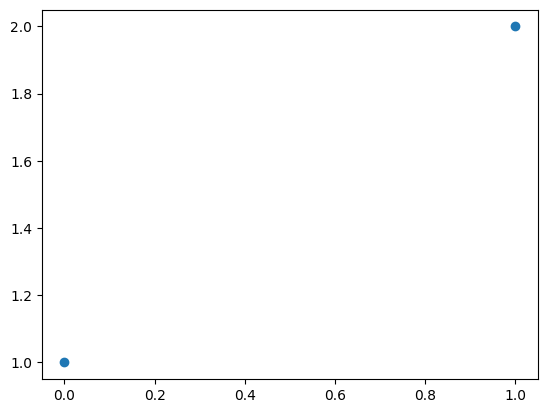

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])
fastMode = False

In [2]:
#Prepare datasets
# fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_1002_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

{'seed': 1002, 'n_ensemble': 3, 'n_epochs': 45, 'use_best_epoch': False, 'extra_data': True, 'trust_neg': 0, 'model_name': 'yolov8m'}


In [4]:
model = loaded_data.untrained_model
model.step1Labels.use_best_epoch = False
model.step1Labels.n_ensemble = 1
model.step1Labels.n_epochs = 201
model.train_data_selector.datasets = ['tom']
model.step1Labels.mosaic=0.0
model.step1Labels.close_mosaic = 100
model.step1Labels.cos_lr = True
model.step1Labels.lrf = 0.0
model.step1Labels.patience = 0
train_data = loaded_data.train_data
test_data = loaded_data.test_data
epoch_list = [50,100,125,150,200]
if fastMode:
    model.step1Labels.n_epochs = 15
    model.step1Labels.trust = 0
    train_data = train_data[::10]
    test_data = test_data[::10]
    epoch_list = [5,10]
#model.step1Labels.mixup = 0.0

In [5]:
for seed in range(100000):
    model2 = copy.deepcopy(model)
    model2.seed = seed
    model2.train(train_data, test_data)
    fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
    import shutil
    shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
    import ultralytics
    data_list = []
    for epoch in epoch_list:
        model2.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights/epoch' + str(epoch) + '.pt')]
        model2.step1Labels.concentration = 2
        model2.run_in_parallel=True
        data_list.append(model2.infer(test_data))
        fls.dill_save(fls.temp_dir + '/intermediate_weights/' + str(epoch) + '.pickle', data_list)
    fls.dill_save(fls.temp_dir + 'intermediate_data' + str(seed) + '.pickle', data_list)

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/76 [00:00<?, ?it/s]

Clearing pytorch


C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\cupyx\jit\_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/4 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 76 tomograms, 0 motors, 0 slices
- Validation data: 4 tomograms, 0 motors, 0 slices
- Dataset directory: d:/flagellar/temp//yolo_dataset/
- YAML configuration: d:/flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at d:/flagellar/temp/training.yaml
Using YAML file: d:/flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: d:/flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.130 available  Update with 'pip install -U ultralytics'
WARNING  'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.110  Python-3.10.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=d:/flagellar/temp/training.yaml, epochs=15, time=None, patience=0, batch=12, imgsz=640, save=True, save_period=5, cache=


train: Scanning D:\flagellar\temp\yolo_dataset\labels\train.cache... 89 images, 30 backgrounds, 0 corrupt: 100%|███████

val: Fast image access  (ping: 0.00.0 ms, read: 21.91.9 MB/s, size: 94.9 KB)



val: Scanning D:\flagellar\temp\yolo_dataset\labels\val.cache... 3 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3

Plotting labels to d:\flagellar\temp\yolo_weights\motor_detector\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to d:\flagellar\temp\yolo_weights\motor_detector
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1     0.0186          1      0.249      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




                Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1     0.0278          1     0.0474     0.0237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00658          1     0.0109    0.00547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00488          1     0.0524     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00193          1     0.0355     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00441          1     0.0622     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1       0.26          1      0.497      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1      0.177          1      0.332      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1      0.013          1      0.332      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1     0.0137          1      0.166     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1     0.0116          1      0.142     0.0675



15 epochs completed in 0.013 hours.
Optimizer stripped from d:\flagellar\temp\yolo_weights\motor_detector\weights\last.pt, 52.0MB
Optimizer stripped from d:\flagellar\temp\yolo_weights\motor_detector\weights\best.pt, 52.0MB

Validating d:\flagellar\temp\yolo_weights\motor_detector\weights\best.pt...
Ultralytics 8.3.110  Python-3.10.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs



                Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1      0.262          1      0.497      0.169
Speed: 0.3ms preprocess, 56.0ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to d:\flagellar\temp\yolo_weights\motor_detector

Training complete!
Clearing cupy
CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/76 [00:00<?, ?it/s]

Clearing pytorch


  0%|          | 0/4 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 76 tomograms, 0 motors, 0 slices
- Validation data: 4 tomograms, 0 motors, 0 slices
- Dataset directory: d:/flagellar/temp//yolo_dataset/
- YAML configuration: d:/flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at d:/flagellar/temp/training.yaml
Using YAML file: d:/flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: d:/flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.130 available  Update with 'pip install -U ultralytics'
WARNING  'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.110  Python-3.10.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=d:/flagellar/temp/training.yaml, epochs=15, time=None, patience=0, batch=12, imgsz=640, save=True, save_period=5, cache=


train: Scanning D:\flagellar\temp\yolo_dataset\labels\train.cache... 89 images, 30 backgrounds, 0 corrupt: 100%|███████

val: Fast image access  (ping: 0.00.0 ms, read: 17.52.0 MB/s, size: 94.9 KB)



val: Scanning D:\flagellar\temp\yolo_dataset\labels\val.cache... 3 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3

Plotting labels to d:\flagellar\temp\yolo_weights\motor_detector\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to d:\flagellar\temp\yolo_weights\motor_detector
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00685          1    0.00754    0.00377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00392          1     0.0042     0.0021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1     0.0034          1    0.00513    0.00205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00323          1    0.00599      0.003



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00493          1     0.0061    0.00366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00541          1    0.00589    0.00412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00585          1    0.00592    0.00415



15 epochs completed in 0.048 hours.
Optimizer stripped from d:\flagellar\temp\yolo_weights\motor_detector\weights\last.pt, 52.0MB
Optimizer stripped from d:\flagellar\temp\yolo_weights\motor_detector\weights\best.pt, 52.0MB

Validating d:\flagellar\temp\yolo_weights\motor_detector\weights\best.pt...
Ultralytics 8.3.110  Python-3.10.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs



                Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1    0.00217          1    0.00737    0.00442
Speed: 0.8ms preprocess, 26.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to d:\flagellar\temp\yolo_weights\motor_detector

Training complete!
Clearing cupy
CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/76 [00:00<?, ?it/s]

Clearing pytorch


  0%|          | 0/4 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 76 tomograms, 0 motors, 0 slices
- Validation data: 4 tomograms, 0 motors, 0 slices
- Dataset directory: d:/flagellar/temp//yolo_dataset/
- YAML configuration: d:/flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at d:/flagellar/temp/training.yaml
Using YAML file: d:/flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: d:/flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.130 available  Update with 'pip install -U ultralytics'
WARNING  'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.110  Python-3.10.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=d:/flagellar/temp/training.yaml, epochs=15, time=None, patience=0, batch=12, imgsz=640, save=True, save_period=5, cache=


train: Scanning D:\flagellar\temp\yolo_dataset\labels\train.cache... 89 images, 30 backgrounds, 0 corrupt: 100%|███████

val: Fast image access  (ping: 0.00.0 ms, read: 17.53.9 MB/s, size: 94.9 KB)



val: Scanning D:\flagellar\temp\yolo_dataset\labels\val.cache... 3 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3

Plotting labels to d:\flagellar\temp\yolo_weights\motor_detector\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to d:\flagellar\temp\yolo_weights\motor_detector
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          3          1          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/15      4.79G      5.068      121.1      2.322         10        640:  50%|█████     | 4/8 [00:02<00:02,  1.54

KeyboardInterrupt: 

<ErrorbarContainer object of 3 artists>

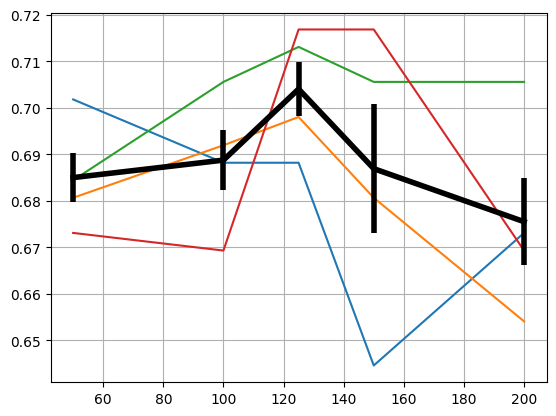

In [10]:
plt.figure()
plt.grid(True)
all_scores = []
for seed in range(10000):
    try:
        data_list = fls.dill_load(fls.temp_dir + 'intermediate_data' + str(seed) +'.pickle')
    except:
        break
    import flg_diagnostics
    import importlib
    importlib.reload(flg_diagnostics)
    scores = []
    for d in data_list:
        a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
        scores.append(fls.score_competition_metric(a,b)[2])
    plt.plot(epoch_list,scores)
    all_scores.append(scores)
all_scores=np.array(all_scores)
plt.errorbar(epoch_list, np.mean(all_scores,axis=0), yerr = np.std(all_scores,axis=0)/np.sqrt(all_scores.shape[0]), linewidth=4, color='black')